<a href="https://colab.research.google.com/github/nicsim22/DS110-Content/blob/main/Lecture25Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

*Both the decision trees and the random forests identified the same factors that contributed to BND outbreaks in countries:  political instability, inflation, interest rates, population density, some other factors.  But all of these factors were related to one super-factor:  the use of cash, instead of credit or debit cards.*

*Bleeding Nail Disease.  Cynthia kicked herself for treating the disease as an abstraction in the data instead of a real phenomenon to learn more about.  What if bleeding nails got blood on cash?  And that cash traded hands?*

*Cynthia decided to forego the fancy machine learning, and see what she got with a simple regression, predicting BND infection rates with credit card adoption rates.*

*Regression* is **fitting a function to a set of points representing inputs and outputs**.  It's an **attempt to find a pattern** in the data, possibly for the purpose of **predicting new output values** for inputs that haven't been observed before.

The output of a regression model is a **continuous value (a number)**, as opposed to ***classification*** where the **output is a label**.  Predicting the temperature, the stock market, or housing values are all regression tasks.


In data science, it's common to perform regressions to model and better understand data, even if it's just the simplest kind of regression, linear regression.  And the simplest kind of linear regression is one with one input ("independent variable") and one output ("dependent variable").  This kind of linear regression produces a simple line to model the relationship between one variable and another.

### Average temperature (in F) for the year in MA by year
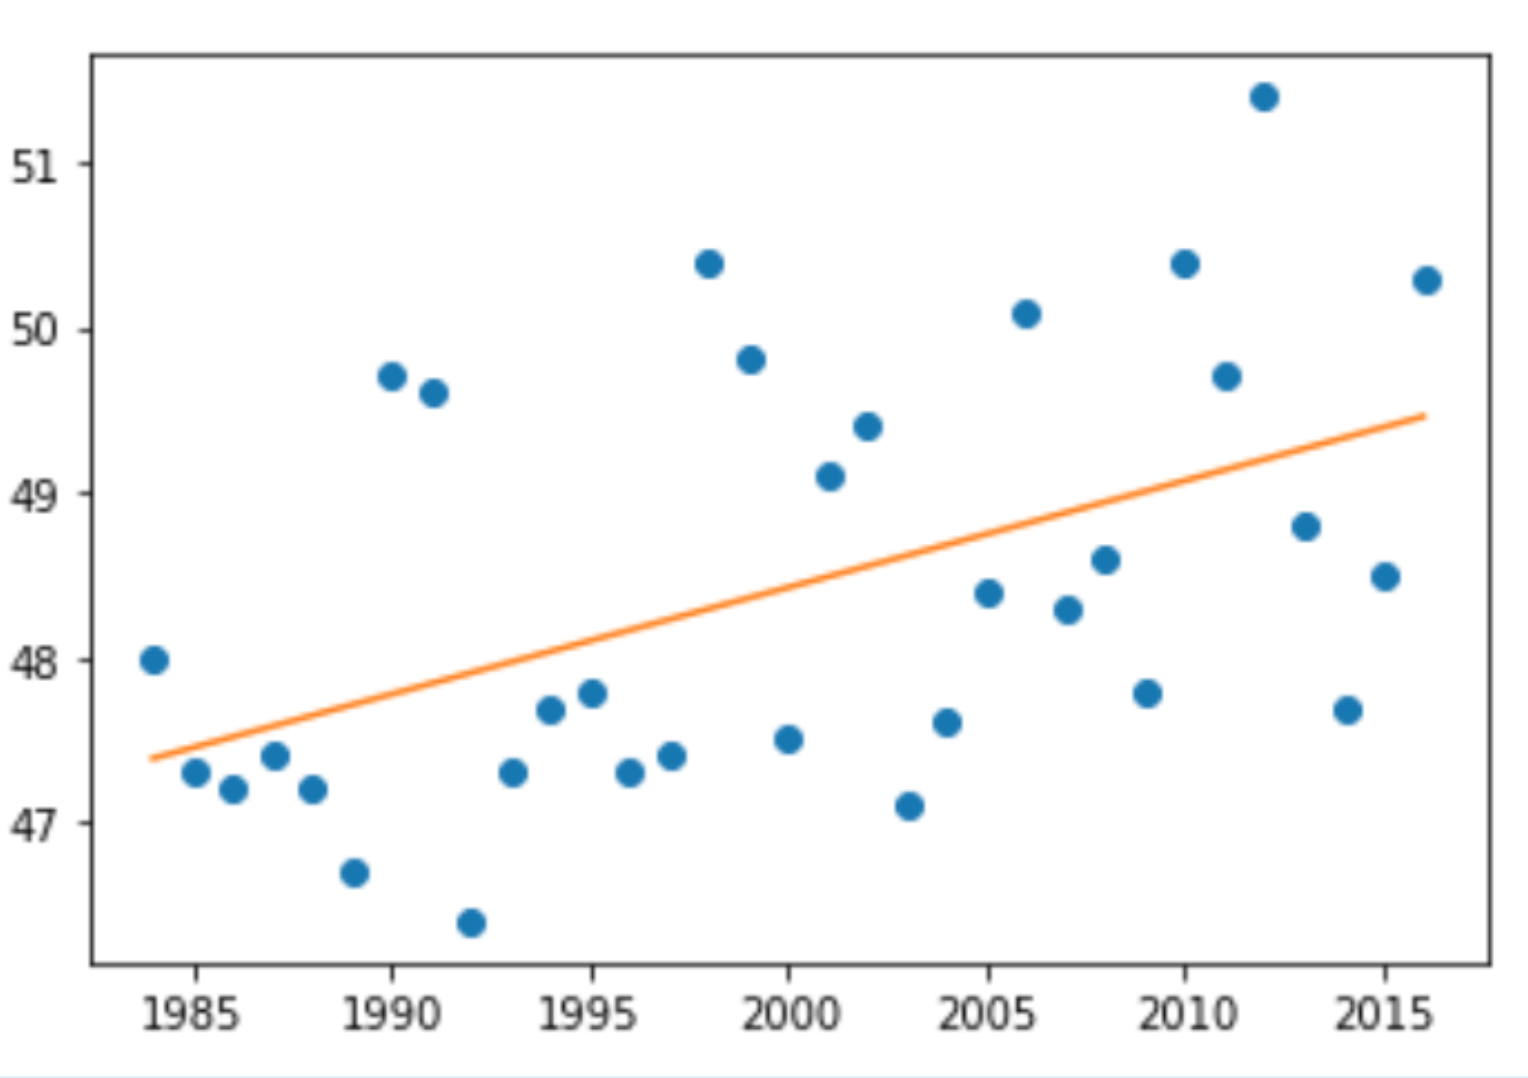

## Linear Regression

In a simple linear regression, we're trying to find the line of the form **$\hat y = mx + b$ that is the best fit to the data**.  The hat over $\hat y$ indicates that it's a **prediction**, not the value $y$ observed in the data.

"Best fit" could be defined a lot of different ways.  Here it's the line that **minimizes the residual sum of squares**, or the sum over all points of the square of the difference between the predicted value $\hat y_i$ and actual value $y_i$:  $RSS(\hat y,y) = \sum_i (\hat y_i - y_i)^2$.  The optimal model can be found straightforwardly using linear algebra (see DS 120).


<img src=" 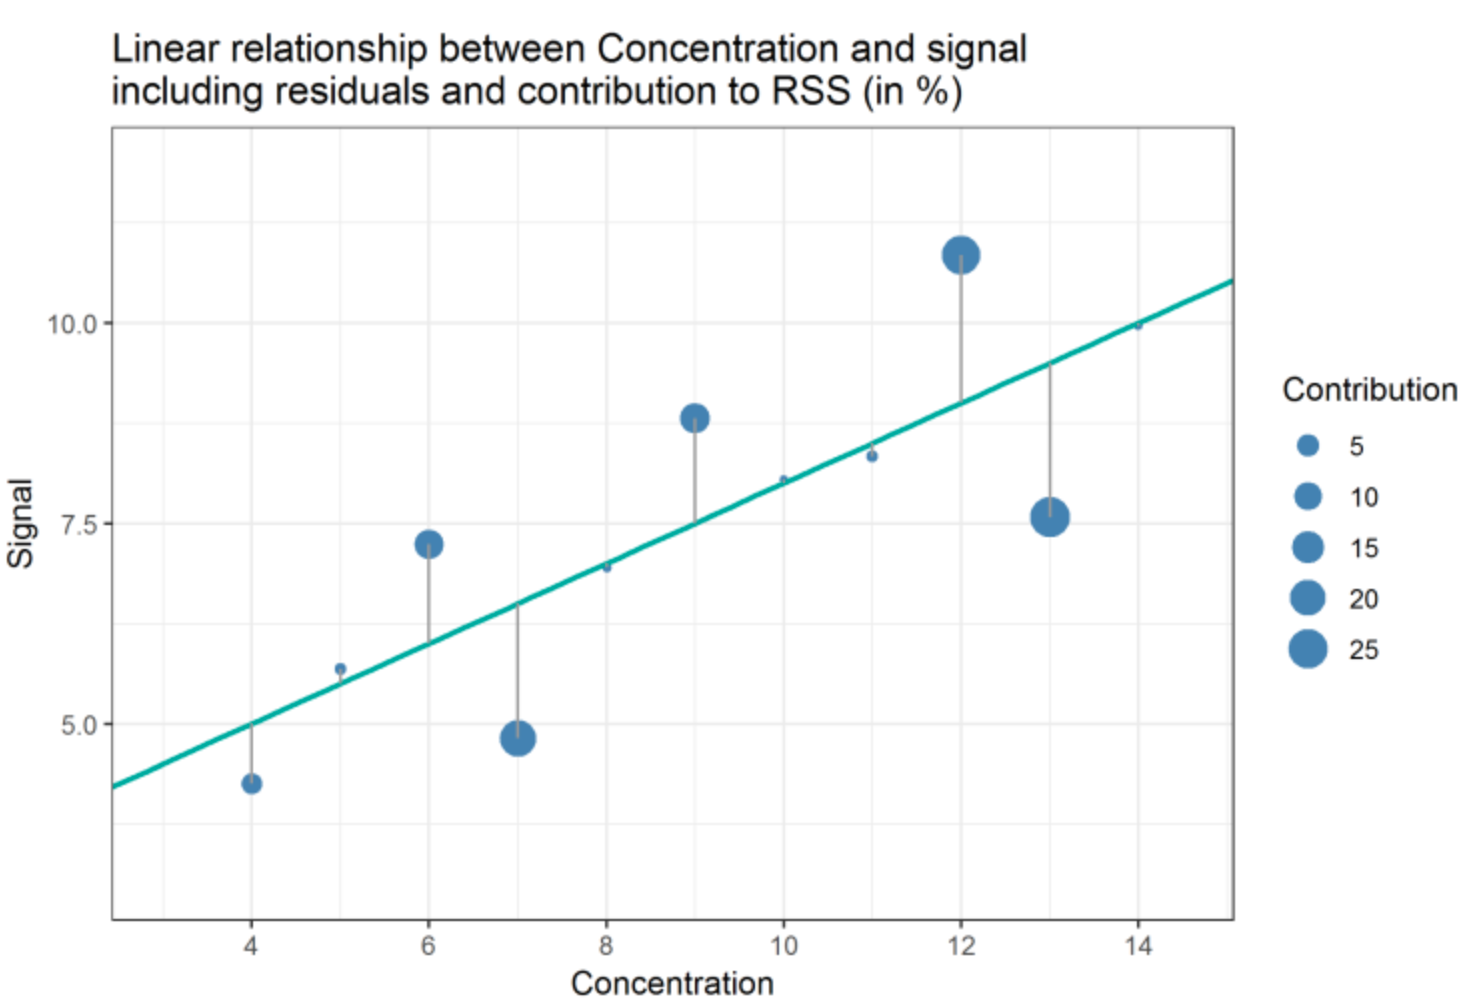">

from https://mpl.loesungsfabrik.de/en/english-blog/method-validation/sum-of-quares-part1


Here are our points to fit.

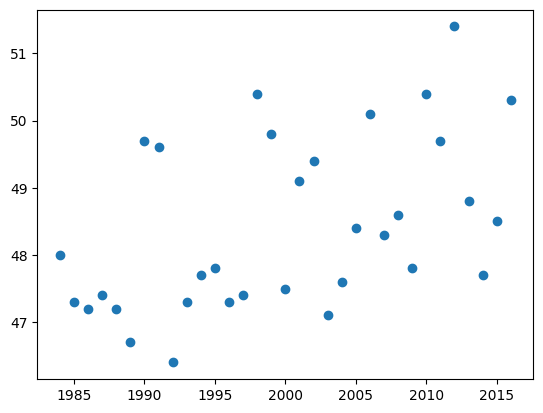

In [ ]:
import numpy as np

# Data from https://www.wbur.org/news/2017/08/23/massachusetts-temperature-precipitation:
# Average temp for the year in F for MA, by year

x = np.linspace(1984, 2016, 33)
y = [48.0, 47.3, 47.2, 47.4, 47.2, 46.7,
     49.7, 49.6, 46.4, 47.3, 47.7, 47.8, 47.3, 47.4, 50.4, 49.8,
     47.5, 49.1, 49.4, 47.1, 47.6, 48.4, 50.1, 48.3, 48.6, 47.8,
     50.4, 49.7, 51.4, 48.8, 47.7, 48.5, 50.3]
# Visualize the points:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.show()

The easiest way to get a linear regression in Python is probably to create a LinearRegression object from sklearn.linear_model.  The interface is very similar to scikit-learn's machine learning classifiers.

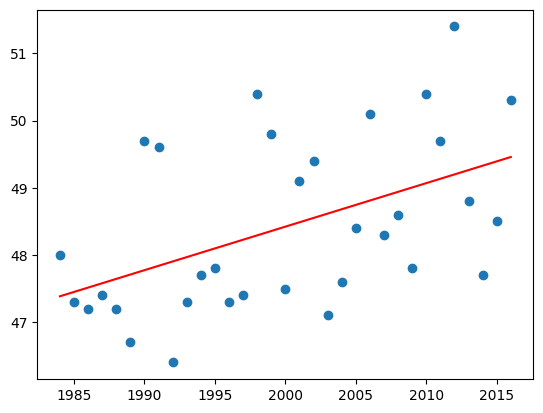

In [ ]:
import sklearn.linear_model as lm

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
x = x.reshape(-1,1) #skitlearn want a 2D set of data, x.reshape reshapes data in 2D
linear_model.fit(x,y)
y_hat = linear_model.predict(x)
plt.plot(x,y,'o')
plt.plot(x,y_hat,'r')
plt.show()

The one surprising thing here is the call to reshape().   LinearRegression expects the x input to be a 2D array, with each row equal to a set of features for one data point.  It isn't expecting a 1D array, even though our simple x data only needs a 1D array to capture the data.  So we have to change [1985, 1986, ...] into [[1985],[1986],...].  (each value has its own row)

reshape()'s arguments are the dimensions of the new array, with -1 a wild card for "make it fit."  So the originally 1D array that calls reshape(-1,1) has 1 column and as many rows as necessary to get all the data.

The coefficients of the model are stored as the fields **coef_** for the x-coefficient and **intercept_** for the y-intercept.  coef_ is a list because in multiple regression, we could have more than one x variable and thus more than one x coefficient.

In [ ]:
print(f'The temperature is rising {linear_model.coef_[0]:.4f} degrees F per year') #.4f -> to 4dp
print(f'{linear_model.intercept_:.2f}')

The temperature is rising 0.0648 degrees F per year
-81.12


The ability to interpret the coefficient as a rate is a nice advantage of linear regression over more complex model.  A climate model probably needs to be more complex than a single coefficient, but it's good to start with simple models and add complexity as needed.

To evaluate the goodness of fit of the line, one measure is the $R^2$ score, also called the coefficient of determination.  It's **1 if the points all lie exactly on the line, 0 if the fit is no better than a line that just returns the average $y$ for everything**, and in between reflects how much of the variance of $y$ is explained by the line.  We can get this number with LinearRegression.score().

//near 1, high correlation, near 0, almost no correlation//

In [ ]:
linear_model.score(x,y) #unlike scikitlearn, score does not give accuracy for linear_model, but gives R^2 value

0.23967385644360317

## Multiple regression

Multiple regression refers to a **linear regression that has more than one independent variable**.  For example, rather than fitting the temperature to the year, we could fit it to multiple atmospheric factors such as methane and carbon dioxide concentrations.

Multiple regression tries to find a function $\hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$ that fits the data.  This function is still called "linear" because it is **simply a weighted sum of its inputs and has no more complex functions in it**.  That's good for getting a very **direct sense of how important the different factors are to the outcome - you can just compare the coefficients**.  But the fit is no longer visualizable as a line; it's a plane for 2 independent variables, and after that, we can't visualize the whole function, which is a "hyperplane."

Multiple regression can be solved by the same techniques as basic linear regression with one independent variable.  So a LinearRegression object can solve for a multiple regression as well.

In [ ]:
methane = np.array([12.81, 25.15, 38.06, 49.47, 60.24, 71.32,
     80.08, 94.14, 96.49, 100.32, 107.54, 111.50, 113.97, 120.26, 132.39, 134.82,
     133.30, 132.60, 135.91, 140.65, 135.76, 136.14, 138.11, 145.90, 152.41, 157.13,
     162.33, 167.15, 172.17, 177.86, 190.62, 200.65, 207.73])

# Carbon dioxide emissions from 1990-2016 in Mass, in millions of tons
# https://www.eia.gov/environment/emissions/state/
mass_co = [84, 82.7, 84.9, 81.7, 81.9, 79.2, 79.9, 85.9, 84.3, 81.9,
           82.9, 82.8,83.7, 85, 83.6, 85, 77.1, 80.4, 77.2, 70.6,
           72.0, 68.1, 61.9, 65.7, 63.8, 65.6, 63.9]
y_from_90 = y[6:]  # From the last example, these are the temperatures
methane_from_90 = methane[6:]

In this case, we just need to prepare the X matrix so that the rows correspond to different datapoints, making each column a different feature.  It's easiest to create an array with the features as the rows, then transpose this matrix.

In [ ]:
x = np.transpose(np.array([mass_co, methane_from_90])) #make a list of lists w feature no 1 values, then feature no2 values
x
#transpose means swapping the rows and columns, eg. 2x3 matrix now becomes 3x2 matrix

array([[ 84.  ,  80.08],
       [ 82.7 ,  94.14],
       [ 84.9 ,  96.49],
       [ 81.7 , 100.32],
       [ 81.9 , 107.54],
       [ 79.2 , 111.5 ],
       [ 79.9 , 113.97],
       [ 85.9 , 120.26],
       [ 84.3 , 132.39],
       [ 81.9 , 134.82],
       [ 82.9 , 133.3 ],
       [ 82.8 , 132.6 ],
       [ 83.7 , 135.91],
       [ 85.  , 140.65],
       [ 83.6 , 135.76],
       [ 85.  , 136.14],
       [ 77.1 , 138.11],
       [ 80.4 , 145.9 ],
       [ 77.2 , 152.41],
       [ 70.6 , 157.13],
       [ 72.  , 162.33],
       [ 68.1 , 167.15],
       [ 61.9 , 172.17],
       [ 65.7 , 177.86],
       [ 63.8 , 190.62],
       [ 65.6 , 200.65],
       [ 63.9 , 207.73]])

In [ ]:
temp_model = LinearRegression()
temp_model.fit(x,y_from_90)
print(temp_model.coef_)
print(temp_model.intercept_)

[-0.0601007   0.00038069]
53.28203003472937


One caveat:  multiple regression can **produce bad or misleading models** when **two or more features are highly correlated**, a phenomenon called **multicollinearity**.  Consider  $(x_0, x_1)$ = (1,1), (2,2), (3,3), $y$ = 1, 2, 3.  The model $y = x_0$ fits all the data, but so does $y = x_1$, and so does $y = 0.5x_0 + 0.5x_1$.  Actually, even worse, so does $y = 100x_0 - 99x_1$, which almost certainly isn't a realistic model.  We can't put too much faith in the coefficients unless we know the features are not very correlated.

## Nonlinear regression

Sometimes - often? - we care more about a tight fit to the data than making sure the function has a neat, concise form.  Regression doesn't need to be linear - it could produce a very complex function that fits the data well.  With this added complexity comes the possibility of overfitting, just like with classification in ML.  In fact, several machine learning methods have regression versions where the trained model produces numerical predictions instead of classifications.

One such machine learning method is decision trees.  Instead of each leaf producing a classification, each leaf can produce a different guess based on the average of its training points.  (The splitting procedure typically uses variance or average mean square error instead of entropy, which is more suited to discrete classification.)  The result is a method that can overfit quite a bit if each leaf represents one training example; some kind of pruning or depth-limiting is necessary to avoid this.  This is another tool in scikit-learn that you could use to fit the data.

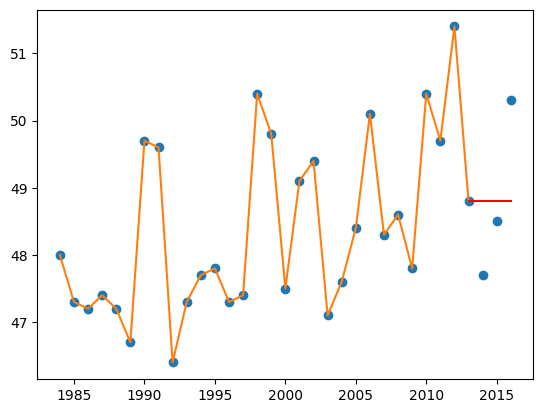

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

model = DecisionTreeRegressor() # no pruning of any kind, so expect overfitting
x = np.linspace(1984, 2016, 33)
x = x.reshape(-1,1)
y = [48.0, 47.3, 47.2, 47.4, 47.2, 46.7,
     49.7, 49.6, 46.4, 47.3, 47.7, 47.8, 47.3, 47.4, 50.4, 49.8,
     47.5, 49.1, 49.4, 47.1, 47.6, 48.4, 50.1, 48.3, 48.6, 47.8,
     50.4, 49.7, 51.4, 48.8, 47.7, 48.5, 50.3]
xtrain = x[:30]
ytrain = y[:30]
model.fit(xtrain,ytrain) #call .fit on training data (first 30 values)
yhat = model.predict(x) #try to predict based on training data
plt.plot(x,y,'o')
plt.plot(x[:30],yhat[:30])
plt.plot(x[29:],yhat[29:],'r') # Plot line to test predictions in red
plt.show()

That wasn't a great use of regression - the decision trees are **overfitting** to the years, and **without any other information to go on for each prediction**, the test set is probably being predicted with a simple rule like "if the year is 2013 or greater..."  We can create smarter predictions with **more context **for each prediction - the previous value, for example - and decision trees that can't overfit as much.

//e.g. no trends, cannot predict what happens in the future, too tied to each year's value

[[1984.     0. ]
 [1985.    48. ]
 [1986.    47.3]
 [1987.    47.2]
 [1988.    47.4]
 [1989.    47.2]
 [1990.    46.7]
 [1991.    49.7]
 [1992.    49.6]
 [1993.    46.4]
 [1994.    47.3]
 [1995.    47.7]
 [1996.    47.8]
 [1997.    47.3]
 [1998.    47.4]
 [1999.    50.4]
 [2000.    49.8]
 [2001.    47.5]
 [2002.    49.1]
 [2003.    49.4]
 [2004.    47.1]
 [2005.    47.6]
 [2006.    48.4]
 [2007.    50.1]
 [2008.    48.3]
 [2009.    48.6]
 [2010.    47.8]
 [2011.    50.4]
 [2012.    49.7]
 [2013.    51.4]
 [2014.    48.8]
 [2015.    47.7]
 [2016.    48.5]]


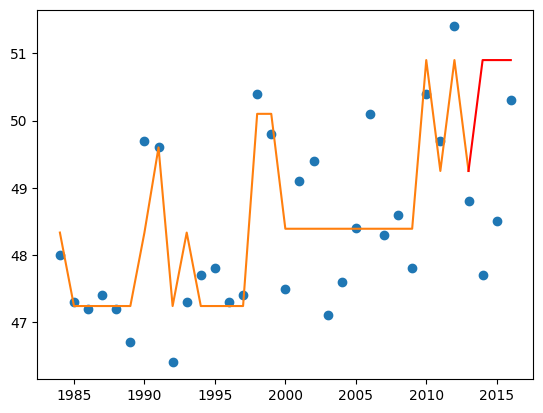

In [ ]:
model = DecisionTreeRegressor(max_depth = 3) # maybe overdoing it on the pruning
x = np.linspace(1984, 2016, 33)
prev_value_features = [0] + y.copy()[:-1] # shift y values so we see the previous one; discard last
combined_features = np.array([x, prev_value_features]).transpose()
print(combined_features)
xtrain = combined_features[:30,:]
model.fit(xtrain,ytrain)
yhat = model.predict(combined_features)
plt.plot(x,y,'o')
plt.plot(x[:30],yhat[:30])
plt.plot(x[29:],yhat[29:],'r')
plt.show()

Random forests and k-nearest neighbors have their own regression methods, too.  Instead of voting, the methods average the predictions of their trees or datapoints, respectively.

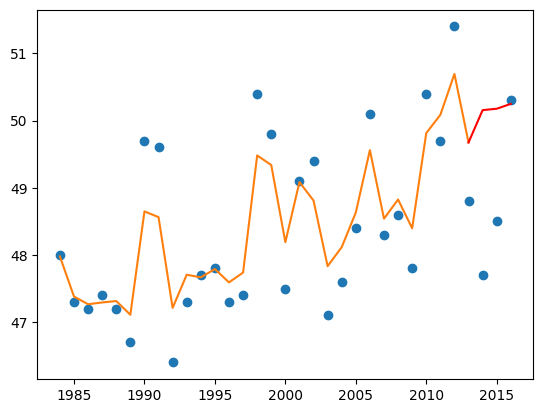

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain,ytrain) # xtrain has the matrix we made in the previous code box
yhat = model.predict(combined_features)
plt.plot(x,y,'o')
plt.plot(x[:30],yhat[:30])
plt.plot(x[29:],yhat[29:],'r')
plt.show()

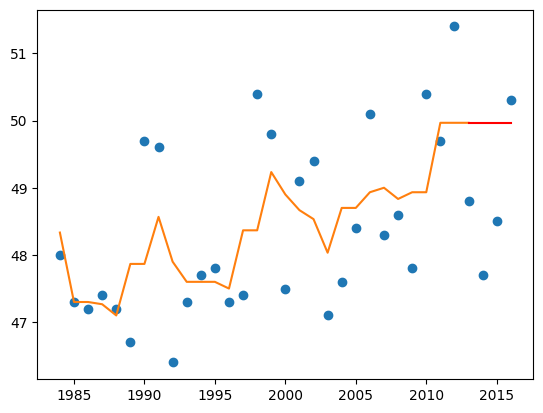

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(xtrain,ytrain) # xtrain has the matrix we made in the previous code box
yhat = model.predict(combined_features)
plt.plot(x,y,'o')
plt.plot(x[:30],yhat[:30])
plt.plot(x[29:],yhat[29:],'r')
plt.show()


Whether these methods are better or worse than linear regression boils down to two main questions.

* First, how much does it matter to you that your model is easily describable and understandable?
* Second, does the added complexity predict withheld points in a test set better than the linear method, or is it merely overfitting?

The answers to these questions will differ from application to application and dataset to dataset.